## Steady State Model of Coral Calcification
### Gagnon et al. 2012

The calcifying fluid is considered to be at steady state when the seawater exchange rate is balanced by precipitation at the site of calcification. This is illustrated in the following box model of a semi-closed fluid, which also includeds a degree of calcium specific transport (+F)(e.g. pumping).
<img src="BoxModelFigure.png" width=300 height= />
Precipitation rate (P) and calcium pumping (F) are area normalized, since they occur through the bottom calcifying layer or the top cell surface. kz$\rho$\[Ca\] defines the seawater exchange, where:

- $k = \frac{ln(2)}{\tau_{1/2}} $ , this can be thought of as the turnover rate, and affects the whole fluid volume.
- z = 'the shape of the calcifying space', i.e. ratio of volume to surface area
- $\rho$ = density of seawater


The following expression relates the skeletal Sr/Ca ratio precipitated at any instant to the flux balance and the partition coefficient, arranged to isolate flux parameters:

$$
\frac{P}{kz\rho[Ca]_{SW}} = \frac{1}{D_{Sr} - 1 + \gamma} \left[ \left (\frac{Sr}{Ca}\right)_{0} \left (\frac{Sr}{Ca}\right)^{-1}_{coral} -1 \right]
$$

where,
- $[Ca]_{SW} =$ the calcium concentration of seawater
- $D_{Sr} = \frac{\left (\frac{Sr}{Ca}\right)_{coral}}{\left (\frac{Sr}{Ca}\right)_{calcifying fluid}}$, the strontium partition coefficient
- $\gamma = F/P$
- $\left (\frac{Sr}{Ca}\right)_{0} = D_{Sr} \left (\frac{Sr}{Ca}\right)_{SW}$, the composition of the skeleton if it were be directly precipitated from seawater

In [1]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
## Defining the parameters

Dsr = 1.257 # strontium partition coefficient
Dmg = 2.74e-4 # magnesium partition coefficient

SrCa_sw = 8.6 # mmol/mol
SrCa_0 = Dsr * SrCa_sw

gamma = 0.5
SrCa_coral = 1
#SrCa_coral = np.arange(0,12,0.5)

In [3]:
## Equation for the skeletal (coral) Sr/Ca ratio, rearanged to isolate the flux parameters 

fluxparam = (1/(Dsr - 1.0 + gamma)) * (SrCa_0 * (1/SrCa_coral) - 1)

fluxparam_log10 = math.log10(fluxparam)

print (fluxparam_log10)

1.1125819819074987


#### Ok, equation is working. Let's write it as a function and try to plot it.

In [59]:
# Write equation as a function

def FluxParSrCaEqu(Dsr, gamma, SrCa_0, SrCa_coral):
    return (1/(Dsr - 1.0 + gamma)) * (SrCa_0 * (1/SrCa_coral) - 1)

In [60]:
## Defining the parameters

Dsr = 1.257 # strontium partition coefficient (unitless)

SrCa_sw = 8.6e-3 # mol/mol
SrCa_0 = Dsr * SrCa_sw

#gamma01 = 0.01

SrCa_coral = np.linspace(1e-6, 12e-3, 100) # in mol/mol

<ipython-input-61-8d5be336a5fc>:3: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParSrCaEqu(Dsr, 0.01, SrCa_0, SrCa_coral)), y, alpha=1, color='c', label='0.01')
<ipython-input-61-8d5be336a5fc>:4: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParSrCaEqu(Dsr, 0.05, SrCa_0, SrCa_coral)), y, alpha=1, color='g', label='0.05')
<ipython-input-61-8d5be336a5fc>:5: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParSrCaEqu(Dsr, 0.1, SrCa_0, SrCa_coral)), y, alpha=1, color='m', label='0.1')
<ipython-input-61-8d5be336a5fc>:6: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParSrCaEqu(Dsr, 0.5, SrCa_0, SrCa_coral)), y, alpha=1, color='y', label='0.5')


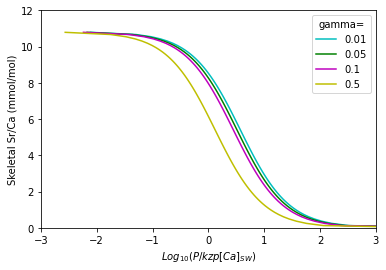

In [61]:
y = SrCa_coral * 1e3  # converting to mmol/mol

plt.plot(np.log10(FluxParSrCaEqu(Dsr, 0.01, SrCa_0, SrCa_coral)), y, alpha=1, color='c', label='0.01')
plt.plot(np.log10(FluxParSrCaEqu(Dsr, 0.05, SrCa_0, SrCa_coral)), y, alpha=1, color='g', label='0.05')
plt.plot(np.log10(FluxParSrCaEqu(Dsr, 0.1, SrCa_0, SrCa_coral)), y, alpha=1, color='m', label='0.1')
plt.plot(np.log10(FluxParSrCaEqu(Dsr, 0.5, SrCa_0, SrCa_coral)), y, alpha=1, color='y', label='0.5')

plt.xlim(-3,3)
plt.ylim(0,12)
plt.xlabel('$Log_{10}(P/kzp[Ca]_{SW}$)')
plt.ylabel('Skeletal Sr/Ca (mmol/mol)')
plt.legend(title="gamma=")

This graph shows us that as the rate of precipitation increases relative to seawater transport (moving right along x-axis), the Sr/Ca ratio decreases. Is this because strontium is not being replaced quick enough by seawater transport and therefore not available to enter the crystal. It is also used up quickly because it is favoured.

The ratio is lowered when more calcium arrives via pumping.

#### Let's test the effect of differing partition coefficients

<ipython-input-67-a1848e7d928a>:7: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParSrCaEqu(2, gamma, SrCa_0, SrCa_coral)), y, alpha=1, color='c', label='2')
<ipython-input-67-a1848e7d928a>:8: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParSrCaEqu(1.25, gamma, SrCa_0, SrCa_coral)), y, alpha=1, color='g', label='1.25')
<ipython-input-67-a1848e7d928a>:9: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParSrCaEqu(1.001, gamma, SrCa_0, SrCa_coral)), y, alpha=1, color='m', label='1.001')
<ipython-input-67-a1848e7d928a>:10: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParSrCaEqu(0.99, gamma, SrCa_0, SrCa_coral)), y, alpha=1, color='brown', label='0.99')
<ipython-input-67-a1848e7d928a>:11: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParSrCaEqu(0.8, gamma, SrCa_0, SrCa_coral)), y, alpha=1, color='salmon', label='0.8')
<ipython-input-67-a1848e7d928a

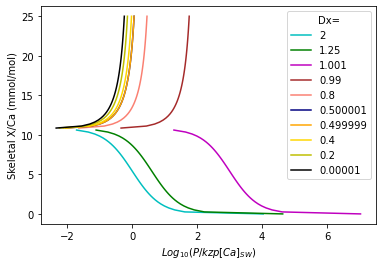

In [67]:
SrCa_coral = np.linspace(1e-6, 25e-3, 100) # in mol/mol

y = SrCa_coral * 1e3  # converting to mmol/mol

gamma = 0.0

plt.plot(np.log10(FluxParSrCaEqu(2, gamma, SrCa_0, SrCa_coral)), y, alpha=1, color='c', label='2')
plt.plot(np.log10(FluxParSrCaEqu(1.25, gamma, SrCa_0, SrCa_coral)), y, alpha=1, color='g', label='1.25')
plt.plot(np.log10(FluxParSrCaEqu(1.001, gamma, SrCa_0, SrCa_coral)), y, alpha=1, color='m', label='1.001')
plt.plot(np.log10(FluxParSrCaEqu(0.99, gamma, SrCa_0, SrCa_coral)), y, alpha=1, color='brown', label='0.99')
plt.plot(np.log10(FluxParSrCaEqu(0.8, gamma, SrCa_0, SrCa_coral)), y, alpha=1, color='salmon', label='0.8')

plt.plot(np.log10(FluxParSrCaEqu(0.500001, gamma, SrCa_0, SrCa_coral)), y, alpha=1, color='navy', label='0.500001')
plt.plot(np.log10(FluxParSrCaEqu(0.499999, gamma, SrCa_0, SrCa_coral)), y, alpha=1, color='orange', label='0.499999')

plt.plot(np.log10(FluxParSrCaEqu(0.4, gamma, SrCa_0, SrCa_coral)), y, alpha=1, color='gold', label='0.4')
plt.plot(np.log10(FluxParSrCaEqu(0.2, gamma, SrCa_0, SrCa_coral)), y, alpha=1, color='y', label='0.2')
plt.plot(np.log10(FluxParSrCaEqu(0.00001, gamma, SrCa_0, SrCa_coral)), y, alpha=1, color='k', label='0.00001')


#plt.xlim(-3,3)
#plt.ylim(0,12)
plt.xlabel('$Log_{10}(P/kzp[Ca]_{SW}$)')
plt.ylabel('Skeletal X/Ca (mmol/mol)')
plt.legend(title="Dx=")

Why is it flipping at 0.5? Flip point appears to be controlled by gamma, which is set to 0.5

Will flip at 1 if gamma is set to 0 (i.e. no calcium from pumping). If gamma is 1 and D is 1, we go to infinity...  

Why does this pumping ratio (gamma) affect an elements incorporation behaviour?

Why do low Dx's result in higher X/Ca at high levels of seawater exchange? If X/Ca in the fluid is being maintained at X/Ca in seawater, wouldn't elements with higher partition coefficients have higher skeletal ratios?

#### Now plotting the effect of varying seawater ratios

<ipython-input-70-32cdaf1f64e5>:12: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParSrCaEqu(Dsr, gamma, Dsr * 1e-5, SrCa_coral)), y, alpha=1, color='c', label='1e-5')
<ipython-input-70-32cdaf1f64e5>:13: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParSrCaEqu(Dsr, gamma, Dsr * 1e-4, SrCa_coral)), y, alpha=1, color='g', label='1e-4')
<ipython-input-70-32cdaf1f64e5>:14: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParSrCaEqu(Dsr, gamma, Dsr * 8.6e-3, SrCa_coral)), y, alpha=1, color='m', label='8.6e-3')
<ipython-input-70-32cdaf1f64e5>:15: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParSrCaEqu(Dsr, gamma, Dsr * 1e-2, SrCa_coral)), y, alpha=1, color='brown', label='1e-2')


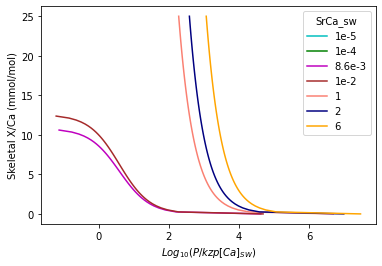

In [70]:
SrCa_coral = np.linspace(1e-6, 25e-3, 100) # in mol/mol
Dsr = 1.257 # the strontium partition coefficient (unitless)
gamma = 0.0

SrCa_sw = 8.6e-3 # mol/mol
SrCa_0 = Dsr * SrCa_sw

y = SrCa_coral * 1e3  # converting to mmol/mol



plt.plot(np.log10(FluxParSrCaEqu(Dsr, gamma, Dsr * 1e-5, SrCa_coral)), y, alpha=1, color='c', label='1e-5')
plt.plot(np.log10(FluxParSrCaEqu(Dsr, gamma, Dsr * 1e-4, SrCa_coral)), y, alpha=1, color='g', label='1e-4')
plt.plot(np.log10(FluxParSrCaEqu(Dsr, gamma, Dsr * 8.6e-3, SrCa_coral)), y, alpha=1, color='m', label='8.6e-3')
plt.plot(np.log10(FluxParSrCaEqu(Dsr, gamma, Dsr * 1e-2, SrCa_coral)), y, alpha=1, color='brown', label='1e-2')
plt.plot(np.log10(FluxParSrCaEqu(Dsr, gamma, Dsr * 1, SrCa_coral)), y, alpha=1, color='salmon', label='1')

plt.plot(np.log10(FluxParSrCaEqu(Dsr, gamma, Dsr * 2, SrCa_coral)), y, alpha=1, color='navy', label='2')
plt.plot(np.log10(FluxParSrCaEqu(Dsr, gamma, Dsr * 6, SrCa_coral)), y, alpha=1, color='orange', label='6')

# plt.plot(np.log10(FluxParSrCaEqu(Dsr, gamma, Dsr * , SrCa_coral)), y, alpha=1, color='gold', label='0.4')
# plt.plot(np.log10(FluxParSrCaEqu(Dsr, gamma, Dsr * , SrCa_coral)), y, alpha=1, color='y', label='0.2')
# plt.plot(np.log10(FluxParSrCaEqu(Dsr, gamma, Dsr * , SrCa_coral)), y, alpha=1, color='k', label='0.00001')


#plt.xlim(-3,3)
#plt.ylim(0,12)
plt.xlabel('$Log_{10}(P/kzp[Ca]_{SW}$)')
plt.ylabel('Skeletal X/Ca (mmol/mol)')
plt.legend(title="SrCa_sw")

#### Now to plot the same thing but for Mg/Ca:

In [8]:
# Write equation as a function

def FluxParMgCaEqu(Dmg, gamma, MgCa_0, MgCa_coral):
    return (1/(Dmg - 1.0 + gamma)) * (MgCa_0 * (1.0/MgCa_coral) - 1.0)

In [11]:
## Defining the parameters

Dmg = 0.000274 # magnesium partition coefficient

MgCa_sw = 5131e-3 # mmol/mol
MgCa_0 = Dmg * MgCa_sw

#gamma01 = 0.01

MgCa_coral = np.linspace(1e-6,12e-3,100)

<ipython-input-12-f3d8c4d677d5>:3: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParMgCaEqu(Dmg, 0.01, MgCa_0, MgCa_coral)), y, alpha=1, color='c', label='0.01')
<ipython-input-12-f3d8c4d677d5>:4: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParMgCaEqu(Dmg, 0.05, MgCa_0, MgCa_coral)), y, alpha=1, color='g', label='0.05')
<ipython-input-12-f3d8c4d677d5>:5: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParMgCaEqu(Dmg, 0.1, MgCa_0, MgCa_coral)), y, alpha=1, color='m', label='0.1')
<ipython-input-12-f3d8c4d677d5>:6: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(FluxParMgCaEqu(Dmg, 0.5, MgCa_0, MgCa_coral)), y, alpha=1, color='y', label='0.5')


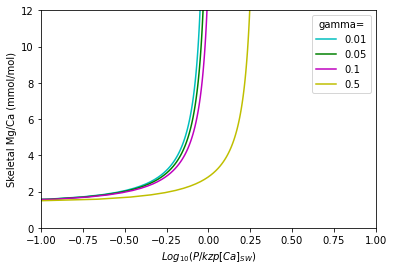

In [12]:
y = MgCa_coral * 1e3

plt.plot(np.log10(FluxParMgCaEqu(Dmg, 0.01, MgCa_0, MgCa_coral)), y, alpha=1, color='c', label='0.01')
plt.plot(np.log10(FluxParMgCaEqu(Dmg, 0.05, MgCa_0, MgCa_coral)), y, alpha=1, color='g', label='0.05')
plt.plot(np.log10(FluxParMgCaEqu(Dmg, 0.1, MgCa_0, MgCa_coral)), y, alpha=1, color='m', label='0.1')
plt.plot(np.log10(FluxParMgCaEqu(Dmg, 0.5, MgCa_0, MgCa_coral)), y, alpha=1, color='y', label='0.5')

plt.xlim(-1,1)
plt.ylim(0,12)
plt.xlabel('$Log_{10}(P/kzp[Ca]_{SW}$)')
plt.ylabel('Skeletal Mg/Ca (mmol/mol)')
plt.legend(title="gamma=")

Is this opposite response we see for Mg/Ca is due to it's low partition coefficient (Dmg < 1, unfavoured)? With an increasing precipitation rate, more Mg is captured in the crystal? 

Effect mainly driven by the fact that as we get less replenishment of seawater and more precipitation, Mg is all that is left and therfore gets incorporated. This is rayleigh fractionation behaviour. 

## Sr/Ca vs. Mg/Ca

The following equation is a general expression relating Sr/Ca and Mg/Ca ratios during precipitation from a semi-closed calcifying fluid at steady-state and in exchange with seawater:

$$
\left (\frac{Sr}{Ca} \right)^{-1} = \left[ \frac{D_{Sr}-1+\gamma}{D_{Mg}-1+\gamma} \right] \left[ \frac{(Mg/Ca)_{0}}{(Sr/Ca)_{0}} \right] \left (\frac{Mg}{Ca} \right)^{-1} + \left (\frac{Sr}{Ca}\right)^{-1}_{0} \left[ 1-\frac{D_{Sr}-1+\gamma}{D_{Mg}-1+\gamma} \right]
$$

In [13]:
# Defining the function

def SrCaEqu(Dsr, gamma, Dmg, MgCa_0, SrCa_0, MgCa_coral):
    return (1/(((Dsr-1+gamma)/(Dmg-1+gamma))*(MgCa_0/SrCa_0)*(1/MgCa_coral) + (1/SrCa_0)*(1-((Dsr-1+gamma)/(Dmg-1+gamma)))))


In [14]:
## Defining the parameters

Dsr = 1.257 # strontium partition coefficient
Dmg = 0.000274 # magnesium partition coefficient

SrCa_sw = 8.6e-3 # mol/mol
SrCa_0 = Dsr * SrCa_sw
# SrCa_coral = np.linspace(8, 10.8,100)

MgCa_sw = 5.131 # mol/mol
MgCa_0 = Dmg * MgCa_sw
MgCa_coral = np.linspace(1e-3,4e-3,100)

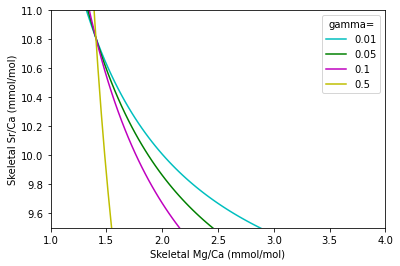

In [15]:
x = MgCa_coral * 1e3

plt.plot(x, 1e3 * SrCaEqu(Dsr, 0.01, Dmg, MgCa_0, SrCa_0, MgCa_coral), alpha=1, color='c', label='0.01')
plt.plot(x, 1e3 * SrCaEqu(Dsr, 0.05, Dmg, MgCa_0, SrCa_0, MgCa_coral), alpha=1, color='g', label='0.05')
plt.plot(x, 1e3 * SrCaEqu(Dsr, 0.1, Dmg, MgCa_0, SrCa_0, MgCa_coral), alpha=1, color='m', label='0.1')
plt.plot(x, 1e3 * SrCaEqu(Dsr, 0.5, Dmg, MgCa_0, SrCa_0, MgCa_coral), alpha=1, color='y', label='0.5')

plt.xlim(1,4)
plt.ylim(9.5,11)
plt.xlabel('Skeletal Mg/Ca (mmol/mol)')
plt.ylabel('Skeletal Sr/Ca (mmol/mol)')
plt.legend(title="gamma=")

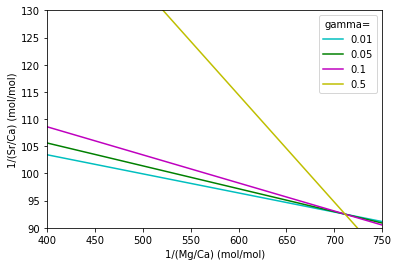

In [18]:
## Trying to plot the inverse curve by simply taking the inverse while plotting

x = MgCa_coral

plt.plot(1/x, (1/(SrCaEqu(Dsr, 0.01, Dmg, MgCa_0, SrCa_0, MgCa_coral))), alpha=1, color='c', label='0.01')
plt.plot(1/x, (1/(SrCaEqu(Dsr, 0.05, Dmg, MgCa_0, SrCa_0, MgCa_coral))), alpha=1, color='g', label='0.05')
plt.plot(1/x, (1/(SrCaEqu(Dsr, 0.1, Dmg, MgCa_0, SrCa_0, MgCa_coral))), alpha=1, color='m', label='0.1')
plt.plot(1/x, (1/(SrCaEqu(Dsr, 0.5, Dmg, MgCa_0, SrCa_0, MgCa_coral))), alpha=1, color='y', label='0.5')


plt.xlim(400,750)
plt.ylim(90,130)
plt.xlabel('1/(Mg/Ca) (mol/mol)')
plt.ylabel('1/(Sr/Ca) (mol/mol)')
plt.legend(title="gamma=")